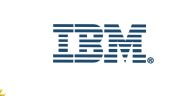

# Segmenting and Clustering Neighborhoods in Toronto | Part-1

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1) Start by creating a new Notebook for this assignment.

2) Hints for scraping Notebook

3) To create the above dataframe:

The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11  in the above table.
If a cell has a borough but a Not assigned  neighborhood, then the neighborhood will be the same as the borough.
Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
4. Submit a link to your Notebook on your Github repository.(10 marks)

Note: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas  to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.


In [28]:
!conda install -c conda-forge beautifulsoup4 --yes

!conda install -c conda-forge geopy --yes

!conda install -c conda-forge folium=0.5.0 --yes

print('Libraries installed!')


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries installed!


In [29]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)

import requests
import json
from pandas.io.json import json_normalize

from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim

import folium
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

print("Libraries Imported")

Libraries Imported


In [30]:
# open Wiki page with Beautiful Soup
data = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(data, 'html.parser')

In [31]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        table_contents.append(cell)

# print(table_contents)
df=pd.DataFrame(table_contents)
df['Borough']=df['Borough'].replace({'Downtown TorontoStn A PO Boxes25 The Esplanade':'Downtown Toronto Stn A',
                                             'East TorontoBusiness reply mail Processing Centre969 Eastern':'East Toronto Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast Toronto':'East York/East Toronto',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

In [32]:
df.head()

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government


In [33]:
# Combining Neighbourhoods with the same Boroughs

df1 = df.groupby(['PostalCode','Borough'])['Neighborhood'].agg(lambda x: tuple(x)).reset_index()
df1.head()

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"(Malvern, Rouge,)"
1,M1C,Scarborough,"(Rouge Hill, Port Union, Highland Creek,)"
2,M1E,Scarborough,"(Guildwood, Morningside, West Hill,)"
3,M1G,Scarborough,"(Woburn,)"
4,M1H,Scarborough,"(Cedarbrae,)"


In [34]:
def neighborhood_list(grouped):    
    return ', '.join(sorted(grouped['Neighborhood'].tolist()))
                    
grp = df.groupby(['PostalCode', 'Borough'])
df2 = grp.apply(neighborhood_list).reset_index(name='Neighborhood')
df2.describe()

,PostalCode,Borough,Neighborhood
count,103,103,103
unique,103,15,103
top,M3C,North York,"The Danforth West, Riverdale"
freq,1,24,1


In [35]:
print(df2.shape)
df2.head()

(103, 3)


,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [36]:
df2.to_csv('toronto.csv', index=False)

# Part 2: Getting coordinates and add to the Toronto DataFrame

Now that you have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood. 

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking  postal code M5G as an example, your code would look something like this:

Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

Note: While including the link do not copy paste the URL. Use the embedded link option in the formatting  tools of the Response field to include the link. Check the  displayed in image below

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: 

GeoSpatial Dataset

Use the Geocoder package or the csv file to create the following dataframe:
Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (2 marks)

Note: While including the link do not copy paste the URL. Use the embedded link option in the formatting  tools of the Response field to include the link. Check the  displayed in image below



In [37]:
!wget -q -O "toronto_coordinates.csv" http://cocl.us/Geospatial_data
print('Coordinates downloaded!')
coors = pd.read_csv('toronto_coordinates.csv')

Coordinates downloaded!


In [38]:
print(coors.shape)

(103, 3)


In [39]:
coors.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [40]:
df_temp = df2.set_index('PostalCode')
coors_temp = coors.set_index('Postal Code')
df_coors = pd.concat([df_temp, coors_temp] , axis = 1 , join='inner')

In [41]:
df_coors.index.name = 'PostalCode'
df_coors.reset_index(inplace = True)

In [42]:
print(df_coors.shape)
df_coors.head()

(103, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


# Part 3: Explore and cluster the neighborhoods in Toronto

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you. 

Just make sure:

1.to add enough Markdown cells to explain what you decided to do andto report any observations you make. 

2.to generate maps to visualize your neighborhoods and how they cluster together. 


Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (3 marks)



In [43]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent = "tl-toronto-neigh")
location = geolocator.geocode(address)
lati = location.latitude
longi = location.longitude
print(f"The co-ordinates of the location are {lati} , {longi}")

The co-ordinates of the location are 43.6534817 , -79.3839347


## Using Folium to generate a Map of Toronto with Boroughs markers(Top)

In [44]:
map_toronto = folium.Map(location = [lati,longi] , zoom_start = 11)

for lat,lon,post,borough,neigh in zip(df_coors['Latitude'],df_coors['Longitude'], df_coors['PostalCode'], df_coors['Borough'],df_coors['Neighborhood']) :
    label = "{} ({}): {}".format(borough, post, neigh)
    popup = folium.Popup(label , parse_html = True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=popup,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.4,
        parse_html=False).add_to(map_toronto)

map_toronto


1) Reduce the number of Boroughs to explore.

2) To reduce the numbers of calls to FourSquare API, we will only explore boroughs that have Toronto in their names.

In [64]:
toronto_boroughs = ['East Toronto', 'Central Toronto', 'Downtown Toronto', 'West Toronto']
toronto_central_df = df_coors[df_coors['Borough'].isin(toronto_boroughs)].reset_index(drop = True)
print(toronto_central_df.shape)
toronto_central_df.head()

(36, 5)


,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [46]:
for lat, long, post, borough, neigh in zip(toronto_central_df['Latitude'], toronto_central_df['Longitude'], toronto_central_df['PostalCode'], toronto_central_df['Borough'], toronto_central_df['Neighborhood']):
    label = "{} ({}): {}".format(borough, post, neigh)
    popup = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, long],
        radius=5,
        popup=popup,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)
    
map_toronto

### Using FourSquare API to explore the Boroughs

In [48]:
CLIENT_ID = '4GEFWONNYSNFLFRDCRBKLNLM4G0KBM5ERQLEPUHEFAXJQP5U'
CLIENT_SECRET = 'JXSIHCONYV1UU0CTXXJPMRLHCUIPSBFTM32Q53EV3313X0IK'
# Set the Current Date (YYYYMMDD)
VERSION = '20210616'    

In [65]:
radius = 500
LIMIT = 100

venues = []

for lat, long, post, borough, neighborhood in zip(toronto_central_df['Latitude'], toronto_central_df['Longitude'], toronto_central_df['PostalCode'], toronto_central_df['Borough'], toronto_central_df['Neighborhood']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results : 
        venues.append((
        post,
        borough,
        neighborhood,
        lat,
        long,
        venue['venue']['name'],
        venue['venue']['location']['lat'], 
        venue['venue']['location']['lng'],  
        venue['venue']['categories'][0]['name']))

In [50]:
venues_df = pd.DataFrame(venues)
venues_df.columns =  ['PostalCode', 'Borough', 'Neighborhood', 'BoroughLatitude', 'BoroughLongitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']
print(venues_df.shape)
venues_df.head()

(1388, 9)


,PostalCode,Borough,Neighborhood,BoroughLatitude,BoroughLongitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
1,M4E,East Toronto,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
2,M4E,East Toronto,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
3,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Cafe Fiorentina,43.677743,-79.350115,Italian Restaurant
4,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


How many venues returned for each postal code?

In [51]:
venues_df.groupby(['PostalCode' , 'Borough' , 'Neighborhood'])['VenueName'].count()

PostalCode  Borough           Neighborhood                                                                                              
M4E         East Toronto      The Beaches                                                                                                     3
M4K         East Toronto      The Danforth West, Riverdale                                                                                   41
M4L         East Toronto      India Bazaar, The Beaches West                                                                                 20
M4M         East Toronto      Studio District                                                                                                28
M4N         Central Toronto   Lawrence Park                                                                                                   5
M4P         Central Toronto   Davisville North                                                                                                9

How many kind of venues categories has returned?

In [52]:
len(venues_df['VenueCategory'].unique())

213

Analyze venues in each area

In [61]:
toronto_central_onehot = pd.get_dummies(venues_df[['VenueCategory']] , prefix="" , prefix_sep="")

toronto_central_onehot['PostalCode'] = venues_df['PostalCode']
toronto_central_onehot['Borough'] = venues_df['Borough']
toronto_central_onehot['Neighborhoods'] = venues_df['Neighborhood']

fixed_columns = list(toronto_central_onehot.columns[-3:]) + list(toronto_central_onehot.columns[:-3])
toronto_central_onehot = toronto_central_onehot[fixed_columns]

print(toronto_central_onehot.shape)
toronto_central_onehot.head()

(1388, 216)


,PostalCode,Borough,Neighborhoods,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,M4E,East Toronto,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,M4E,East Toronto,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

Find the frequency of occurance of each category in an area

In [67]:
toronto_central_venues_freq = toronto_central_onehot.groupby(['PostalCode' , 'Borough' , 'Neighborhoods']).mean().reset_index()
print(toronto_central_venues_freq.shape)
toronto_central_venues_freq.head()

(36, 216)


,PostalCode,Borough,Neighborhoods,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,Gay Bar,German Restaurant,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Health Food Store,Historic Site,History Museum,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Lawyer,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Organic Grocery,Park,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Summer Camp,Supermarket,Sushi Restaurant,Swim School,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Yoga Studio
0,M4E,East Toronto,The Beaches,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.00000,0.00,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.00,0.000000,0.00000,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.00

Find the top 10 most occurance venue types in each area.

In [70]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['PostalCode', 'Borough', 'Neighborhoods']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))

columns = areaColumns+freqColumns
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['PostalCode'] = toronto_central_venues_freq['PostalCode']
neighborhoods_venues_sorted['Borough'] = toronto_central_venues_freq['Borough']
neighborhoods_venues_sorted['Neighborhoods'] = toronto_central_venues_freq['Neighborhoods']

for ind in np.arange(toronto_central_venues_freq.shape[0]):
    row_categories = toronto_central_venues_freq.iloc[ind, :].iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    neighborhoods_venues_sorted.iloc[ind, 3:] = row_categories_sorted.index.values[0:num_top_venues]

neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
neighborhoods_venues_sorted.head()



,PostalCode,Borough,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Boat or Ferry,Sculpture Garden,Coffee Shop,Rental Car Location,Bar,Airport Gate
31,M6J,West Toronto,"Little Portugal, Trinity",Bar,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,New American Restaurant,Coffee Shop,Café,Salon / Barbershop,Malay Restaurant,Boutique
33,M6P,West Toronto,"High Park, The Junction South",Bar,Café,Mexican Restaurant,Bakery,Cajun / Creole Restaurant,Gastropub,Restaurant,Thai Restaurant,Fried Chicken Joint,Fast Food Restaurant
32,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",Breakfast Spot,Café,Sandwich Place,Coffee Shop,Convenience Store,Nightclub,Stadium,Restaurant,Furniture / Home Store,Bar
26,M5T,Downtown Toronto,"Kensington Market, Chinatown, Grange Park",Café,Coffee Shop,Vegetarian / Vegan Restaurant,Mexican Restaurant,Burger Joint,Thai Restaurant,Vietnamese Restaurant,Gaming Cafe,Bar,Food Court


 Using KMeans algorithm, try to cluster the toronto central areas into 3 different clusters.

In [73]:

kclusters = 3

toronto_central_venues_freq_clustering = toronto_central_venues_freq.drop(['PostalCode' , 'Borough' , 'Neighborhoods'] , 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_central_venues_freq_clustering)

toronto_central_clustered_df = toronto_central_df
toronto_central_clustered_df['Cluster'] = kmeans.labels_

toronto_central_clustered_df = toronto_central_clustered_df.join(neighborhoods_venues_sorted.drop(['Borough', 'Neighborhoods'], 1).set_index('PostalCode'), on='PostalCode')
toronto_central_clustered_df.sort_values(['Cluster'] + freqColumns, inplace=True)
toronto_central_clustered_df

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Pub,Neighborhood,Moroccan Restaurant,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant
23,M5P,Central Toronto,Forest Hill North & West,43.696948,-79.411307,0,Jewelry Store,Park,Trail,Bus Line,Sushi Restaurant,Adult Boutique,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,0,Park,Lawyer,Swim School,Bus Line,Business Service,Adult Boutique,Monument / Landmark,Mediterranean Restaurant,Men's Store,Mexican Restaurant
10,M4W,Downtown Toronto,Rosedale,43.679563,-79.377529,0,Park,Playground,Trail,Adult Boutique,Moroccan Restaurant,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160,0,Restaurant,Tennis Court,Lawyer,Summer Camp,Trail,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant
22,M5N,Central Toronto,Roselawn,43.711695,-79.416936,1,Fast Food Restaurant,Garden,Park,Monument / Landmark,Market,Martial Arts School,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant
27,M5V,Downtown Toronto,"CN Tower, King and Spadina, Railway Lands, Har...",43.628947,-79.394420,2,Airport Service,Airport Lounge,Airport Terminal,Harbor / Marina,Boat or Ferry,Sculpture Garden,Coffee Shop,Rental Car Location,Bar,Airport Gate
31,M6J,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,2,Bar,Asian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,New American Restaurant,Coffee Shop,Café,Salon / Barbershop,Malay Restaurant,Boutique
33,M6P,West Toronto,"High Park, The Junction South",43.661608,-79.464763,2,Bar,Café,Mexican Restaurant,Bakery,Cajun / Creole Restaurant,Gastropub,Restaurant,Thai Restaurant,Fried Chicken Joint,Fast Food Restaurant
32,M6K,West Toronto,"Brockton, Parkdale Village, Exhibition Place",43.636847,-79.428191,2,Breakfast Spot,Café,Sandwich Place,Coffee Shop,Convenience Store,Nightclub,Stadium,Restaurant,Furniture / Home Store,Bar


### Show those clusters onto a map

In [74]:
map_clusters = folium.Map(location=[lati, longi], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, post, bor, poi, cluster in zip(toronto_central_clustered_df['Latitude'], toronto_central_clustered_df['Longitude'], toronto_central_clustered_df['PostalCode'], toronto_central_clustered_df['Borough'], toronto_central_clustered_df['Neighborhood'], toronto_central_clustered_df['Cluster']):
    label = folium.Popup('{} ({}): {} - Cluster {}'.format(bor, post, poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters